In [2]:
from  scipy import fft,ifft
import numpy as np
import matplotlib.pyplot as plt
from classical_ham import classical_ham
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
n=7
dt=10
h=classical_ham(n=n, start_mu=0.75, start_p0=-10, start_sigma=.3,dt=dt)
v=(h.x**2-0.98*h.x**4)*1
h.set_V(v)
# h.set_V(h.x**2)
r=[]
DT=np.linspace(0,30,400)
for T in tqdm(DT):
    r.append(h.simple_v(T))
r=np.array(r)

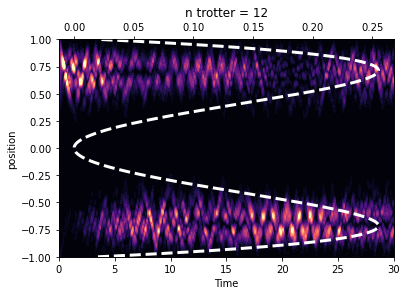

In [108]:
fig,ax=plt.subplots()
ax.contourf(DT,h.x,r.T,40,cmap="magma",vmax=.1)
ax1=ax.twiny()
ax1.plot(h.v,h.x,c="w",lw=3,ls="--")
ax.set_title(f"n trotter = {int(2**n/dt)}")
ax.set_ylabel("position")
ax.set_xlabel("Time")
plt.savefig("../figs/double_well.png",dpi=300)
plt.show()